In [ ]:
import os
import sys
if 'COLAB_GPU' in os.environ:
    from google.colab import drive
    drive.mount('/content/drive')
    sys.path.insert(0,'/content/drive/MyDrive/Colab Notebooks/packages')
    !pip install git+https://github.com/keras-team/keras-tuner.git
    !pip install autokeras
else:
    path_fill = 'data/2022/filled_trian.csv'
    path_raw_train='data/2022/train.csv'
    path_A='data/2022/test_A榜.csv'

In [ ]:
import pandas as pd
import useful_functions as uf
import autokeras as ak
df_train = pd.read_csv(path_raw_train).head(500)
df_train_filled = pd.read_csv(path_fill,index_col=0).head(500)
df_test_A = pd.read_csv(path_A)

2023-04-26 15:53:42.290022: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Mode first,then go IQR filtering, then OneHot, then check corrlation, then

IQR method

Many has only zero, delete one with zero

In [ ]:
df_nu = uf.get_numerical_df(df_train_filled)

In [ ]:
IQR_filtering = uf.IQR_filtering

IQR filtering

In [ ]:
df_train_filled.loc[:,IQR_filtering(df_nu).columns] = IQR_filtering(df_nu)

OneHot create_dummies()

In [ ]:
df_train_filled=uf.create_dummies(df_train_filled)

now drop labels
uf.drop_high_corr_columns()---->list

In [ ]:
x_sample = df_train_filled.drop(['CUST_UID'], axis=1)
x_sample.sample(frac=1).reset_index(drop=True)
y_sample = x_sample.LABEL
x_sample = x_sample.drop(['LABEL'], axis=1)

In [ ]:
drop_col = uf.drop_high_corr_columns(df_train, x_sample)
x_sample=x_sample.drop(drop_col, axis=1)

看一下分布

/var/folders/8m/p6_n224d6jx10l339sh4rsdw0000gn/T/ipykernel_56898/216756226.py:15: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 3000x2500 with 0 Axes>

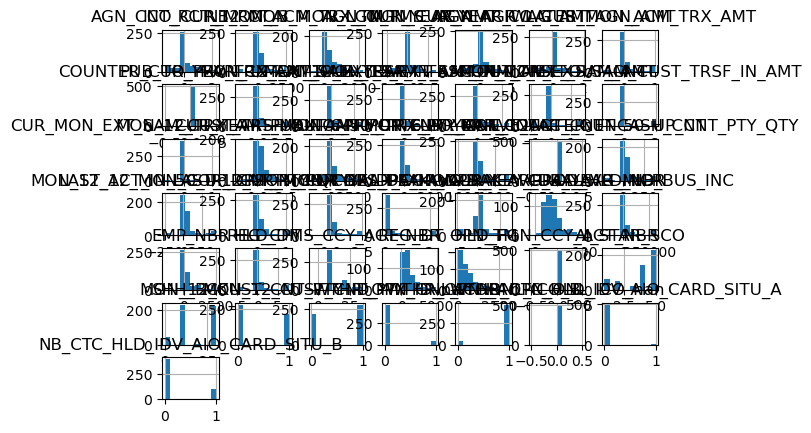

In [ ]:
# 导入必要的库
import matplotlib.pyplot as plt

# 创建一个示例dataframe
df = pd.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [6, 7, 8, 9, 10], 'C': [11, 12, 13, 14, 15]})

# 调整图形大小
plt.figure(figsize=(30, 25))

# 绘制每一列的直方图
x_sample.iloc[:, :43].hist(legend=None)


# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()

,AGN_CNT_RCT_12_MON,ICO_CUR_MON_ACM_TRX_TM,NB_RCT_3_MON_LGN_TMS_AGV,AGN_CUR_YEAR_AMT,AGN_CUR_YEAR_WAG_AMT,AGN_AGR_LATEST_AGN_AMT,ICO_CUR_MON_ACM_TRX_AMT,COUNTER_CUR_YEAR_CNT_AMT,PUB_TO_PRV_TRX_AMT_CUR_YEAR,MON_12_EXT_SAM_TRSF_IN_AMT,...,NB_CTC_HLD_IDV_AIO_CARD_SITU_E,NB_CTC_HLD_IDV_AIO_CARD_SITU_F,NB_CTC_HLD_IDV_AIO_CARD_SITU_nan,LGP_HLD_CARD_LVL_A,LGP_HLD_CARD_LVL_B,LGP_HLD_CARD_LVL_C,LGP_HLD_CARD_LVL_D,LGP_HLD_CARD_LVL_E,LGP_HLD_CARD_LVL_F,LGP_HLD_CARD_LVL_nan
0,-1.560883e+05,70.0,423.300000,-1.817677e+09,5.047545e+08,1.010124e+08,2.587998e+07,0.0,6.607300e+05,262372472.2,...,0,0,0,0,0,0,1,0,0,0
1,2.280000e+03,220.0,783.131874,1.177657e+07,4.412362e+08,1.964624e+06,1.475550e+07,0.0,1.266063e+05,0.0,...,0,0,0,0,0,0,0,0,1,0
2,-1.089318e+06,0.0,-156.311311,-4.598293e+08,3.130245e+08,4.599820e+06,0.000000e+00,0.0,0.000000e+00,0.0,...,0,0,0,0,0,0,0,0,1,0
3,-5.782936e+05,-1634.0,20.000000,2.970520e+09,2.218253e+09,-7.100510e+07,1.021678e+09,0.0,0.000000e+00,0.0,...,0,0,0,0,0,0,1,0,0,0
4,-8.771333e+05,-1634.0,336.991623,1.168100e+09,3.291222e+09,-1.350607e+08,1.021678e+09,0.0,-1.939603e+07,-417167400.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.910170e+05,-1634.0,63.300000,1.636642e+08,2.221937e+09,6.978458e+07,1.021678e+09,0.0,0.000000e+00,695279000.0,...,0,0,0,0,0,0,1,0,0,0
496,-6.751011e+05,70.0,140.000000,2.295455e+09,8.419197e+08,-1.145446e+08,5.618110e+05,0.0,0.000000e+00,2889520.0,...,0,0,0,0,0,0,1,0,0,0
497,1.449591e+06,80.0,256.700000,-2.289124e+09,6.712577e+08,-1.699152e+07,2.527055e+06,0.0,2.612976e+05,0.0,...,0,0,0,0,1,0,0,0,0,0
498,2.350000e+03,1980.0,563.300000,9.656134e+06,1.599868e+06,7.986200e+04,5.718226e+08,0.0,8.079700e+04,0.0,...,0,0,0,0,0,0,1,0,0,0


In [12]:
# Initialize the structured data classifier.
clf = ak.StructuredDataClassifier(
    overwrite=True, max_trials=3
)  # It tries 3 different models.
# Feed the structured data classifier with training data.
clf.fit(
    # The path to the train.csv file.
    x=x_sample,
    y=y_sample,
    validation_split=0.15,
    # epochs=10,
)


Trial 3 Complete [00h 00m 08s]
val_accuracy: 0.7115384340286255

Best val_accuracy So Far: 0.7115384340286255
Total elapsed time: 00h 00m 25s
INFO:tensorflow:Oracle triggered exit


2023-04-26 15:57:14.748680: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_47' with dtype int64 and shape [500]
	 [[{{node Placeholder/_47}}]]
2023-04-26 15:57:14.749305: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_34' with dtype int64 and shape [500]
	 [[{{node Placeholder/_34}}]]
2023-04-26 15:57:14.844429: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_29' with dtype double and shape [500

Epoch 1/2


2023-04-26 15:57:18.804161: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_5' with dtype int64 and shape [500]
	 [[{{node Placeholder/_5}}]]
2023-04-26 15:57:18.805097: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_34' with dtype int64 and shape [500]
	 [[{{node Placeholder/_34}}]]


16/16 [==============================] - 2s 3ms/step - loss: 0.5875 - accuracy: 0.6880
Epoch 2/2
16/16 [==============================] - 0s 2ms/step - loss: 0.5201 - accuracy: 0.7540


2023-04-26 15:57:22.270408: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,32]
	 [[{{node inputs}}]]
2023-04-26 15:57:23.402930: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,32]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: ./structured_data_classifier/best_model/assets


INFO:tensorflow:Assets written to: ./structured_data_classifier/best_model/assets


TypeError: evaluate() missing 1 required positional argument: 'x'

In [15]:
# Predict with the best model.
predicted_y = clf.predict(df_test_A)
# Evaluate the best model with testing data.
print(clf.evaluate(x_sample,y_sample))

NameError: name 'df_test_A' is not defined